### importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### loading the dataset

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/File/JEOPARDY_CSV.csv')

In [5]:
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,31-12-2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,31-12-2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,31-12-2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,31-12-2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,31-12-2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [6]:
df.shape

(216930, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Show Number  216930 non-null  int64 
 1    Air Date    216930 non-null  object
 2    Round       216930 non-null  object
 3    Category    216930 non-null  object
 4    Value       213296 non-null  object
 5    Question    216930 non-null  object
 6    Answer      216926 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.6+ MB


In [9]:
df.isnull().sum()

Show Number       0
 Air Date         0
 Round            0
 Category         0
 Value         3634
 Question         0
 Answer           4
dtype: int64

### droping null values

In [10]:
df.dropna(inplace=True)

In [11]:
df[' Answer'].value_counts()

China                      212
Australia                  211
Japan                      193
France                     191
Chicago                    189
                          ... 
the Postmaster General       1
The Tyger                    1
The Brontes                  1
the Social Security Act      1
"The Edge"                   1
Name:  Answer, Length: 87130, dtype: int64

In [12]:
df[' Air Date'] = pd.to_datetime(df[' Air Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213292 entries, 0 to 216928
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Show Number  213292 non-null  int64         
 1    Air Date    213292 non-null  datetime64[ns]
 2    Round       213292 non-null  object        
 3    Category    213292 non-null  object        
 4    Value       213292 non-null  object        
 5    Question    213292 non-null  object        
 6    Answer      213292 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 13.0+ MB


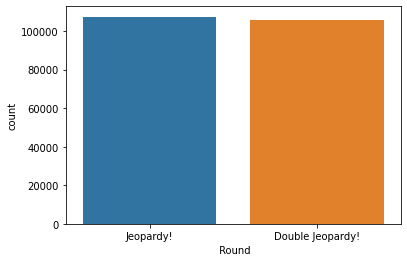

In [14]:
sns.countplot(x =' Round', data =df)

In [37]:
# removing ',' and '$' from 'value' column

df['Value'] = df[' Value'].apply(lambda value: value.replace(',', '').replace('$', ''))

In [16]:
df['Value'] = df['Value'].apply(pd.to_numeric)

In [17]:
df.drop([' Value'],axis=1, inplace = True)

In [18]:
def binning(value):
    if value < 1000:
        return np.round(value, -2)
    elif value < 10000:
        return np.round(value, -3)
    else:
        return np.round(value, -4)

df['ValueBin'] = df['Value'].apply(binning)

In [19]:
df.head()

,Show Number,Air Date,Round,Category,Question,Answer,Value,ValueBin
0,4680,2004-12-31,Jeopardy!,HISTORY,"For the last 8 years of his life, Galileo was ...",Copernicus,200,200
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,200,200
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,The city of Yuma in this state has a record av...,Arizona,200,200
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,200,200
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,"Signer of the Dec. of Indep., framer of the Co...",John Adams,200,200


In [20]:
df.drop(['Value'], axis = 1,inplace = True)

In [21]:
df.drop([' Category'], axis = 1,inplace = True)

In [22]:
df.head(3)

,Show Number,Air Date,Round,Question,Answer,ValueBin
0,4680,2004-12-31,Jeopardy!,"For the last 8 years of his life, Galileo was ...",Copernicus,200
1,4680,2004-12-31,Jeopardy!,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,200
2,4680,2004-12-31,Jeopardy!,The city of Yuma in this state has a record av...,Arizona,200


In [23]:
from sklearn.model_selection import train_test_split

show_numbers = df['Show Number'].unique()
train_shows, test_shows = train_test_split(show_numbers, test_size=0.2, random_state=2019)

train_mask = df['Show Number'].isin(train_shows)
test_mask = df['Show Number'].isin(test_shows)

train_labels = df.loc[train_mask, 'ValueBin']
train_questions = df.loc[train_mask, ' Question']
test_labels = df.loc[test_mask, 'ValueBin']
test_questions = df.loc[test_mask, ' Question']

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(stop_words='english', max_features=2000)
bow.fit(df[' Question'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [25]:
X_train = bow.transform(train_questions)
X_test = bow.transform(test_questions)

y_train = train_labels
y_test = test_labels

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (170702, 2000)
Shape of X_test: (42590, 2000)
Shape of y_train: (170702,)
Shape of y_test: (42590,)


## LogisticRegression model

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression( multi_class='multinomial', max_iter=200)
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
from sklearn.metrics import classification_report

y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
         100       0.05      0.00      0.00      1863
         200       0.18      0.14      0.15      6131
         300       0.06      0.00      0.01      1801
         400       0.21      0.58      0.30      8425
         500       0.11      0.01      0.01      1827
         600       0.11      0.01      0.02      4099
         700       0.00      0.00      0.00        41
         800       0.15      0.10      0.12      6278
         900       0.00      0.00      0.00        28
        1000       0.19      0.20      0.19      6720
        2000       0.19      0.09      0.12      4938
        3000       0.00      0.00      0.00       198
        4000       0.00      0.00      0.00       121
        5000       0.00      0.00      0.00        61
        6000       0.00      0.00      0.00        21
        7000       0.00      0.00      0.00         9
        8000       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(df[' Question'])

train_sequence = tokenizer.texts_to_sequences(train_questions)
test_sequence = tokenizer.texts_to_sequences(test_questions)

print("Original text:", train_questions[0])
print("Converted sequence:", train_sequence[0])

Original text: For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory
Converted sequence: [7, 1, 112, 272, 102, 4, 14, 189, 7842, 9, 226, 173, 5421, 7, 41553, 2, 571, 1552]


In [29]:
X_train = pad_sequences(train_sequence, maxlen=50)
X_test = pad_sequences(test_sequence, maxlen=50)

print(X_train.shape)
print(X_test.shape)

(170702, 50)
(42590, 50)


In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['ValueBin'])

y_train = le.transform(train_labels)
y_test = le.transform(test_labels)

print(y_train.shape)
print(y_test.shape)

(170702,)
(42590,)


In [31]:
num_words = tokenizer.num_words
output_size = len(le.classes_)

In [46]:
model = Sequential([
    Embedding(input_dim=num_words, 
              output_dim=200, 
              mask_zero=True, 
              input_length=50),
    Bidirectional(LSTM(150, return_sequences=True)),
    GlobalMaxPooling1D(),
    Dense(300, activation='relu'),
    Dropout(0.5),
    Dense(output_size, activation='softmax')

])

model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 200)           10000000  
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 300)           421200    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_40 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 21)                6321      
Total params: 10,517,821
Trainable params: 10,517,821
Non-trainable params: 0
__________________________________________

In [40]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPooling1D, LSTM, Bidirectional, Embedding, Dropout

model = Sequential([
    Embedding(input_dim=num_words, 
              output_dim=200, 
              mask_zero=True, 
              input_length=50),
    Bidirectional(LSTM(150, return_sequences=True)),
    GlobalMaxPooling1D(),
    Dense(300, activation='relu'),
    Dropout(0.5),
    Dense(output_size, activation='softmax')
    
])

model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 200)           10000000  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50, 300)           421200    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 21)                6321      
Total params: 10,517,821
Trainable params: 10,517,821
Non-trainable params: 0
__________________________________________

In [33]:
model.fit(X_train, y_train, epochs=10, batch_size=1024, validation_split=0.1)

Epoch 1/10
151/151 [==============================] - 76s 436ms/step - loss: 2.4025 - accuracy: 0.1646 - val_loss: 2.1062 - val_accuracy: 0.2036
Epoch 2/10
151/151 [==============================] - 61s 404ms/step - loss: 2.0884 - accuracy: 0.2102 - val_loss: 2.0935 - val_accuracy: 0.2080
Epoch 3/10
151/151 [==============================] - 62s 408ms/step - loss: 1.9666 - accuracy: 0.2590 - val_loss: 2.1402 - val_accuracy: 0.1999
Epoch 4/10
151/151 [==============================] - 61s 407ms/step - loss: 1.7773 - accuracy: 0.3471 - val_loss: 2.3033 - val_accuracy: 0.1894
Epoch 5/10
151/151 [==============================] - 62s 407ms/step - loss: 1.5136 - accuracy: 0.4608 - val_loss: 2.5612 - val_accuracy: 0.1754
Epoch 6/10
151/151 [==============================] - 61s 404ms/step - loss: 1.2455 - accuracy: 0.5666 - val_loss: 2.9493 - val_accuracy: 0.1759
Epoch 7/10
151/151 [==============================] - 60s 400ms/step - loss: 1.0228 - accuracy: 0.6463 - val_loss: 3.6120 - val_ac

In [47]:
y_pred = model.predict(X_test, batch_size=1024).argmax(axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00      1863
           2       0.12      0.00      0.00      6131
           3       0.00      0.00      0.00      1801
           4       0.21      0.00      0.01      8425
           5       0.04      0.16      0.07      1827
           6       0.10      0.01      0.01      4099
           7       0.00      0.05      0.00        41
           8       0.00      0.00      0.00      6278
           9       0.00      0.32      0.00        28
          10       0.15      0.06      0.09      6720
          11       0.10      0.01      0.02      4938
          12       0.01      0.02      0.01       198
          13       0.00      0.31      0.01       121
          14       0.00      0.07      0.00        61
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00         9
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
